In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(2115, 22, 1000)


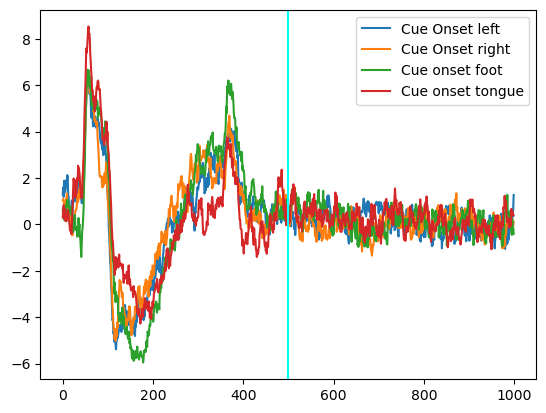

In [3]:
## Loading and visualizing the data

## Loading the dataset


X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])






In [4]:

## Preprocessing the dataset

X_train_valid_prep = X_train_valid[:,:,0:500]
X_test_prep = X_test[:,:,0:500]




print(X_train_valid_prep.shape)
print(y_train_valid.shape)
print(X_test_prep.shape)
print(y_test.shape)



## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)





    




(2115, 22, 500)
(2115,)
(443, 22, 500)
(443,)
Shape of training set: (1615, 22, 500)
Shape of validation set: (500, 22, 500)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after adding width info: (1615, 22, 500, 1)
Shape of validation set after adding width info: (500, 22, 500, 1)
Shape of test set after adding width info: (443, 22, 500, 1)
Shape of training set after dimension reshaping: (1615, 500, 1, 22)
Shape of validation set after dimension reshaping: (500, 500, 1, 22)
Shape of test set after dimension reshaping: (443, 500, 1, 22)


In [5]:
# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(500,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 167, 1, 25)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 167, 1, 25)       100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 167, 1, 25)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 167, 1, 50)        12550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 1, 50)        0

In [6]:
# Model parameters
learning_rate = 1e-3
epochs = 50
cnn_optimizer = keras.optimizers.Adam(lr=learning_rate)

/Users/anaghasrivatsav/anaconda3/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# Compiling the model
basic_cnn_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_results = basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)



Epoch 1/50


2024-03-12 22:43:48.469549: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 1s 38ms/step - loss: 2.1848 - accuracy: 0.2836 - val_loss: 1.8820 - val_accuracy: 0.3280
Epoch 2/50
26/26 [==============================] - 1s 34ms/step - loss: 1.9526 - accuracy: 0.3362 - val_loss: 1.8308 - val_accuracy: 0.3940
Epoch 3/50
26/26 [==============================] - 1s 29ms/step - loss: 1.7681 - accuracy: 0.3678 - val_loss: 1.6242 - val_accuracy: 0.3660
Epoch 4/50
26/26 [==============================] - 1s 28ms/step - loss: 1.7474 - accuracy: 0.3746 - val_loss: 1.4163 - val_accuracy: 0.4380
Epoch 5/50
26/26 [==============================] - 1s 28ms/step - loss: 1.6679 - accuracy: 0.3926 - val_loss: 1.3148 - val_accuracy: 0.4720
Epoch 6/50
26/26 [==============================] - 1s 27ms/step - loss: 1.5263 - accuracy: 0.4056 - val_loss: 1.3710 - val_accuracy: 0.4240
Epoch 7/50
26/26 [==============================] - 1s 28ms/step - loss: 1.4843 - accuracy: 0.4266 - val_loss: 1.3824 - val_accuracy: 0.4140
Epoch 8/50
26/26 [======

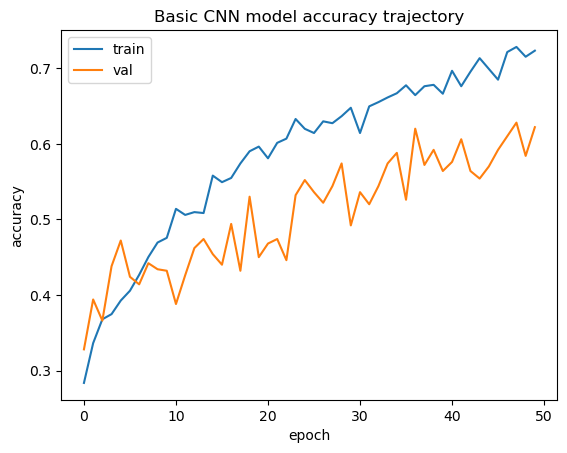

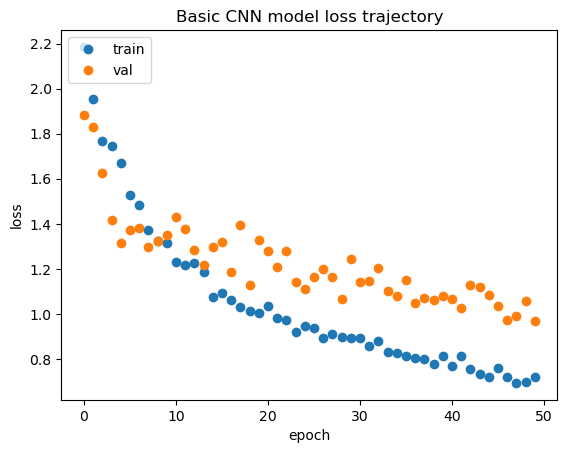

In [8]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_results.history['accuracy'])
plt.plot(basic_cnn_model_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_results.history['loss'],'o')
plt.plot(basic_cnn_model_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
## Testing the basic CNN model

cnn_score = basic_cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.6139954924583435


In [10]:
import math
from tempfile import TemporaryDirectory
import torch
from torch import nn, Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset
from typing import Tuple
import os
import torch.nn.init as init

In [11]:

x_train = torch.from_numpy(x_train)
x_valid = torch.from_numpy(x_valid)
x_test = torch.from_numpy(x_test)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [12]:

y_train= torch.from_numpy(y_train)
y_valid= torch.from_numpy(y_valid)
y_test = torch.from_numpy(y_test)

In [82]:


class TransformerClassificationHead(nn.Module):
    def __init__(self, input_size, num_classes):
        super(TransformerClassificationHead, self).__init__()

        # Global average pooling layer
        self.global_avg_pooling = nn.AdaptiveAvgPool1d(1)        

        # Output layer
        self.output_layer = nn.Linear(input_size, num_classes)
        init.xavier_uniform_(self.output_layer.weight)
        init.zeros_(self.output_layer.bias)

        # Softmax activation
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Global average pooling

        
        

        x = self.global_avg_pooling(x.permute(0, 2, 1)).squeeze(-1)
        

        


        # Fully connected layer

        #print(self.fc(x))
        #x = self.fc(x)
       
        
        x = self.output_layer(x)
  

        # Softmax activation
       
     

        return x



In [100]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR

def train(model, input_array, ground_truth_array, num_epochs=1, batch_size=64, learning_rate=0.0001):
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)
    #optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    #scheduler = StepLR(optimizer, step_size=20, gamma=0.01) 

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        # Iterate over batches manually
        for i in range(0, len(input_array), batch_size):
            batch_inputs = input_array[i:i + batch_size]
            batch_labels = ground_truth_array[i:i + batch_size]

            # Convert to appropriate data type and device
            batch_inputs = torch.tensor(batch_inputs, dtype=torch.float32)
            batch_labels = torch.tensor(batch_labels, dtype=torch.long)


            optimizer.zero_grad()
            outputs = model(batch_inputs)
            
           
            loss = criterion(outputs, batch_labels.float())
   

        # Add L1 regularization term to the loss
      
            #loss = loss +  0.0009 * torch.norm(model.parameters(), 1)
        
            
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
           
            predictions = torch.argmax(outputs, dim=1)
            total_samples += batch_labels.size(0)
            
            actual =  torch.argmax(torch.transpose(batch_labels, 0, 1), dim=0)

            
            

           
            
            correct_predictions += (predictions == actual).sum().item()
            
           

        # Print average loss for the epoch
        average_loss = total_loss / (len(input_array) / batch_size)
        average_accuracy = correct_predictions / total_samples
        print(f'Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}, Accuracy: {average_accuracy}')
    
        

    # Save the trained model if needed
    torch.save(model.state_dict(), 'trained_model.pth')
    return average_accuracy, average_loss


In [80]:
class PositionalEncoding(nn.Module):
  def __init__(self, d_model: int, dropout: float = 0.1, max_length: int = 500):
    """
    Args:
      d_model:      dimension of embeddings
      dropout:      randomly zeroes-out some of the input
      max_length:   max sequence length
    """
    # inherit from Module
    super().__init__()     

    # initialize dropout                  
    self.dropout = nn.Dropout(p=dropout)      

    # create tensor of 0s
    pe = torch.zeros(max_length, d_model)    

    # create position column   
    k = torch.arange(0, max_length).unsqueeze(1)  

    # calc divisor for positional encoding 
    div_term = torch.exp(                                 
            torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model)
    )

    # calc sine on even indices
    pe[:, 0::2] = torch.sin(k * div_term)    

    # calc cosine on odd indices   
    pe[:, 1::2] = torch.cos(k * div_term)  

    # add dimension     
    pe = pe.unsqueeze(0)          

    # buffers are saved in state_dict but not trained by the optimizer                        
    self.register_buffer("pe", pe)                        

  def forward(self, x: Tensor):
    """
    Args:
      x:        embeddings (batch_size, seq_length, d_model)
    
    Returns:
                embeddings + positional encodings (batch_size, seq_length, d_model)
    """
    # add positional encoding to the embeddings
 
    
    pos_emb = (self.pe[:, : x.size(1)].requires_grad_(False) ).permute(1,0,2)
  
    x = x + pos_emb
    
  

    # perform dropout
    return self.dropout(x)

In [88]:


# Step 1: Define the Transformer Model
class MyTransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, nhead, nlayers, output_dim):
        super(MyTransformerModel, self).__init__()
        self.transformer = nn.Transformer(
            d_model=input_dim,
            nhead=nhead,
            num_encoder_layers=nlayers,
            num_decoder_layers=nlayers,
            dim_feedforward=hidden_dim,
        )
        self.fc = nn.Linear(input_dim, output_dim)
        
    def forward(self, src):
       
        src = src.permute(0, 1, 3, 2).squeeze(3)
       
        
        output = self.transformer(src, src)
        output = self.fc(output)
        return output

In [101]:

emsize = 22 # embedding dimension
d_hid = 1024 # dimension of the feedforward network model in ``nn.TransformerEncoder``
nlayers = 2  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 2  # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability
d_out = 15
lr =  1e-4  # learning rate

position = PositionalEncoding(emsize)
transformer = MyTransformerModel(emsize,d_hid, nhead, nlayers, d_out )
classification_head = TransformerClassificationHead(d_out,4 )
full_model =  nn.Sequential(position, transformer, classification_head)
accuracy = []
validation = []

#train(full_model,x_train, y_train)

In [102]:
with TemporaryDirectory() as tempdir:
    best_model_params_path = os.path.join(tempdir, "best_model_params.pt")
    validation = []
    accuracy_history = []
   
    for epoch in range(1, 900):
        full_model.train()
        average_acc, average_loss = train(full_model,x_train, y_train)
        full_model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            outputs = full_model(x_valid.float())
            _, predicted = torch.max(outputs, 1)
            total += y_valid.size(0)
            actual = torch.argmax(torch.transpose(y_valid, 0, 1), dim=0)
            correct += (predicted == actual).sum().item()

            

        accuracy = correct / total
        print("epoch", epoch)
        print("valid:", accuracy)
        print("train:", average_acc)
        print("-----------------------------------")
        accuracy_history.append(average_acc)
        validation.append(accuracy)
    
        
    

/var/folders/6s/pmb9msz548l8bq4nm5fqllj40000gn/T/ipykernel_47801/1178582870.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_inputs = torch.tensor(batch_inputs, dtype=torch.float32)
/var/folders/6s/pmb9msz548l8bq4nm5fqllj40000gn/T/ipykernel_47801/1178582870.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_labels = torch.tensor(batch_labels, dtype=torch.long)


Epoch 1/1, Average Loss: 1.4293499170073045, Accuracy: 0.24891640866873066
epoch 1
valid: 0.276
train: 0.24891640866873066
-----------------------------------
Epoch 1/1, Average Loss: 1.4287735835686557, Accuracy: 0.25882352941176473
epoch 2
valid: 0.254
train: 0.25882352941176473
-----------------------------------
Epoch 1/1, Average Loss: 1.427269676373839, Accuracy: 0.2594427244582043
epoch 3
valid: 0.256
train: 0.2594427244582043
-----------------------------------
Epoch 1/1, Average Loss: 1.4263142872151944, Accuracy: 0.2631578947368421
epoch 4
valid: 0.252
train: 0.2631578947368421
-----------------------------------
Epoch 1/1, Average Loss: 1.4248737205292787, Accuracy: 0.265015479876161
epoch 5
valid: 0.268
train: 0.265015479876161
-----------------------------------
Epoch 1/1, Average Loss: 1.423694551544662, Accuracy: 0.2656346749226006
epoch 6
valid: 0.266
train: 0.2656346749226006
-----------------------------------
Epoch 1/1, Average Loss: 1.422015206068293, Accuracy: 0.27

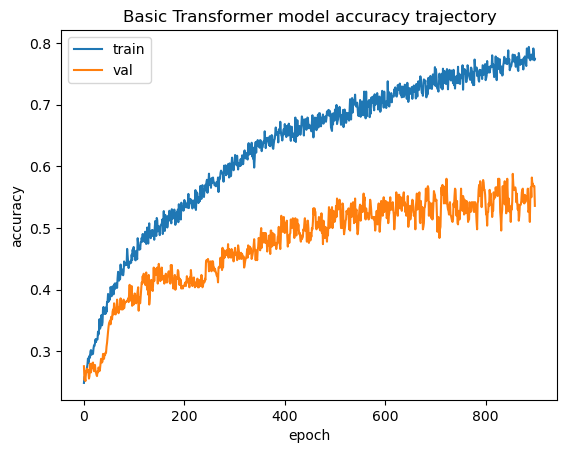

In [103]:
plt.plot(accuracy_history)
plt.plot(validation)
plt.title('Basic Transformer model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [165]:
for i in range(0, 30):
    with torch.no_grad():
                outputs = full_model(x_test.float())
                _, predicted = torch.max(outputs, 1)
                total += y_test.size(0)
                actual = torch.argmax(torch.transpose(y_test, 0, 1), dim=0)
                correct += (predicted == actual).sum().item()
                accuracy = correct / total
print("test accuracy: ", accuracy)
            

test accuracy:  0.5600666454316027


In [173]:
from torchinfo import summary
summary(full_model)

Layer (type:depth-idx)                                                      Param #
Sequential                                                                  --
├─PositionalEncoding: 1-1                                                   --
│    └─Dropout: 2-1                                                         --
├─MyTransformerModel: 1-2                                                   --
│    └─Transformer: 2-2                                                     --
│    │    └─TransformerEncoder: 3-1                                         96,472
│    │    └─TransformerDecoder: 3-2                                         100,608
│    └─Linear: 2-3                                                          345
├─TransformerClassificationHead: 1-3                                        --
│    └─AdaptiveAvgPool1d: 2-4                                               --
│    └─Linear: 2-5                                                          64
│    └─Softmax: 2-6                  